In [1]:
import pandas as pd
import numpy as np
from visuals import *

In [2]:
# SEE: https://zenodo.org/record/4632335#.YkGzOShBz4c
filename = '../data/GlobalAlienSpeciesFirstRecordDatabase_v2.xlsx'

df_orig = pd.read_excel(filename, sheet_name=None)
# There are 3 sheets of the excel file
print(df_orig.keys())
df_orig = df_orig['GlobalAlienSpeciesFirstRecordDa']
df_orig.info(show_counts=True)
df_orig['Region'] = df_orig['Region'].str.lower()

df_orig.head()


dict_keys(['ReadMe', 'GlobalAlienSpeciesFirstRecordDa', 'References'])
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61751 entries, 0 to 61750
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TaxonName         61751 non-null  object
 1   scientificName    61751 non-null  object
 2   Family            57925 non-null  object
 3   Order             60709 non-null  object
 4   Class             60664 non-null  object
 5   Phylum            60793 non-null  object
 6   Taxonomy          57045 non-null  object
 7   OrigName          61751 non-null  object
 8   LifeForm          61571 non-null  object
 9   Region            61751 non-null  object
 10  Island            17552 non-null  object
 11  PresentStatus     33473 non-null  object
 12  FirstRecord       61751 non-null  int64 
 13  FirstRecord_orig  61751 non-null  object
 14  Source            61751 non-null  object
dtypes: int64(1), object(14)
memory us

,TaxonName,scientificName,Family,Order,Class,Phylum,Taxonomy,OrigName,LifeForm,Region,Island,PresentStatus,FirstRecord,FirstRecord_orig,Source
0,Acanthophora muscoides,Acanthophora muscoides (L.) Bory,Rhodomelaceae,Ceramiales,Florideophyceae,Rhodophyta,GBIF,"Acanthophora muscoides Linnaeus, 1753",Algae,turkey,NaN,NaN,1986,1986,Cinar et al. (2005)
1,Acanthophora nayadiformis,"Acanthophora nayadiformis (Delile) Papenf., 1968",Rhodomelaceae,Ceramiales,Florideophyceae,Rhodophyta,GBIF,Acanthophora nayadiformis,Algae,cyprus,yes,alien,1997,1997,DAISIE
2,Acanthophora nayadiformis,"Acanthophora nayadiformis (Delile) Papenf., 1968",Rhodomelaceae,Ceramiales,Florideophyceae,Rhodophyta,GBIF,Acanthophora nayadiformis,Algae,greece,NaN,NaN,1861,1861,AquaNIS (2020)
3,Acanthophora nayadiformis,"Acanthophora nayadiformis (Delile) Papenf., 1968",Rhodomelaceae,Ceramiales,Florideophyceae,Rhodophyta,GBIF,"Acanthophora nayadiformis (Delile) Papenfuss, ...",Algae,turkey,NaN,NaN,1970,1970,Cinar et al. (2005)
4,Acanthophora spicifera,Acanthophora spicifera (M.Vahl) Børgesen,Rhodomelaceae,Ceramiales,Florideophyceae,Rhodophyta,GBIF,Acanthophora spicifera,Algae,hawaiian islands,yes,NaN,1952,1952,Carlton & Eldrege (2009)


In [3]:
# Filter island
df = df_orig[df_orig['Island'].str.lower() != 'yes']
# df.info(show_counts=True)
len(df.index)


44199

In [4]:
not_islands = ['united kingdom', 'ireland', 'new zealand', 'tasmania', 
                'japan', 'indonesia', 'taiwan', 'philippines', 'dominican republic',
                'greece', 'canada', 'hong kong']
for island in not_islands:
    df_orig.loc[df_orig['Region'] == island, 'Island'] = 'no'

# Island
df_island = df_orig[df_orig['Island'] == 'yes']
region_island = df_island['Region'].unique()

region = df_orig['Region'].unique()
print(f'Out of the {len(region_island)}, {len(region_island)} are island.')

# count invasions on islands
invasions = []
for reg in region_island:
    inv = df_island[df_island['Region'] == reg]
    inv = len(inv.index)
    invasions.append(inv)
    if inv > 1200:
        print(reg)
    # print(inv)
print(f'Islands invasion: mean: {np.mean(invasions)}, std:{np.std(invasions)}, max: {np.max(invasions)}, min: {np.min(invasions)}')

Out of the 115, 115 are island.
hawaiian islands
Islands invasion: mean: 83.8695652173913, std:241.29136353629042, max: 2239, min: 1


In [5]:
df = df_orig
col = ['TaxonName', 'Family', 'LifeForm', 'Region', 'FirstRecord']
df = df[col]
df = df.dropna()

# Get the correct one
# df = df[(df['LifeForm'] != 'Insects') & (df['LifeForm'] != 'Vascular plants') & (df['LifeForm'] != 'Fishes') \
#         & (df['LifeForm'] != 'Birds') & (df['LifeForm'] != 'Algae') \
#         & (df['LifeForm'] != 'Invertebrates (excl. Arthropods, Molluscs)') 
#         & (df['LifeForm'] != 'Molluscs') & (df['LifeForm'] != 'Crustaceans') \
#         & (df['LifeForm'] != 'Fungi') & (df['LifeForm'] != 'Reptiles') \
#         # & (df['LifeForm'] != 'Arthropods p.p. (Myriapods, Diplopods etc.)') & (df['LifeForm'] != 'Mammals') \
#         # & (df['LifeForm'] != 'Amphibians') & (df['LifeForm'] != 'Bryophytes') \
#         # & (df['LifeForm'] != 'Amphibians') & (df['LifeForm'] != 'nan') \
#         & (df['LifeForm'] != 'Bryozoa') & (df['LifeForm'] != 'Spiders') \
        # ]
df = df[(df['FirstRecord'] >= 1850) & (df['FirstRecord'] <= 2010)]
# df = df[df['Island'] != 'yes']  #filter islands

# df = df[df['FirstRecord'] > 1800]
first_year = np.min(df['FirstRecord'])
last_year = np.max(df['FirstRecord'])
print(f'The dataset range from {first_year} to {last_year}')

The dataset range from 1850 to 2010


In [39]:
df.info(show_counts=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50563 entries, 0 to 61568
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TaxonName    50563 non-null  object
 1   Family       50563 non-null  object
 2   LifeForm     50563 non-null  object
 3   Region       50563 non-null  object
 4   FirstRecord  50563 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.3+ MB


,TaxonName,Family,LifeForm,Region,FirstRecord
0,Acanthophora muscoides,Rhodomelaceae,Algae,Turkey,1986
1,Acanthophora nayadiformis,Rhodomelaceae,Algae,Cyprus,1997
2,Acanthophora nayadiformis,Rhodomelaceae,Algae,Greece,1861
3,Acanthophora nayadiformis,Rhodomelaceae,Algae,Turkey,1970
4,Acanthophora spicifera,Rhodomelaceae,Algae,Hawaiian Islands,1952


findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


There are 18 families and 276 regions
There are 19390 species.
Algae[512], Amphibians[97], Arthropods p.p. (Myriapods, Diplopods etc.)[152], Bacteria and protozoans[22], Birds[927], Bryophytes[107], Bryozoa[104], Crustaceans[638], Fishes[774], Fungi[428], Insects[5196], Invertebrates (excl. Arthropods, Molluscs)[725], Mammals[242], Molluscs[605], Reptiles[197], Spiders[37], Vascular plants[8625], Viruses[6], 

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


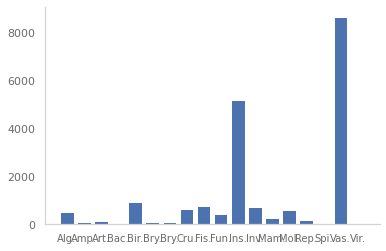

In [6]:
family = df['LifeForm'].unique()
region = df['Region'].unique()

print(f'There are {len(family)} families and {len(region)} regions')
species = df['TaxonName'].unique()

count_animals = []
print(f'There are {len(species)} species.')
for p in family:
    df_s = df[df['LifeForm'] == p]
    animals = df_s['TaxonName'].unique()
    animals = len(animals)
    count_animals.append(animals)
    print(f'{p}[{animals}]', end=', ')

# Plot histogram of families and how many entries
import matplotlib.pyplot as plt

plt.bar(range(len(count_animals)), count_animals, align='center')
firstletter_family = [f[:3]+'.' for f in family]
plt.xticks(range(len(family)), firstletter_family, size='small')
plt.savefig('../../latex/figures/histogram_taxfam.png', dpi=1200)
plt.show()

In [7]:
# Filter out all the irrelevant species and regions
# TODO This is really really really slow. A better way to do it?
# Filter out irrelevant data

spec_iter = np.zeros(len(species), dtype=int)
reg_iter = np.zeros(len(region), dtype=int)

for idx, s in enumerate(species):
    df_s = df[df['TaxonName'] == s]
    # n_iter = len(df_s)
    spec_iter[idx] = len(df_s)
    # print(f'The species {s} has {spec_iter[idx]} iteractions')


for idx, s in enumerate(region):
    df_s = df[df['Region'] == s]
    # n_iter = len(df_s)
    reg_iter[idx] = len(df_s)
    # print(f'The species {s} has {spec_iter[idx]} iteractions')

In [8]:
# TODO This is really really really slow. A better way to do it?
# select the species that have less than 3 iteractions
remove_s_idx = np.where(spec_iter < 20)
remove_r_idx = np.where(reg_iter < 50)

# Filter the dataset: remove all rows belonging to species with less than 3 iteractions
for s in species[remove_s_idx]:
    # print(s)  
    df = df.drop(df[df['TaxonName'] == s].index)

# Filter the dataset: remove all rows belonging to region with less than 10 invasions
for s in region[remove_r_idx]:
    # print(s)  
    df = df.drop(df[df['Region'] == s].index)

species_removed = len(species) - len(df['TaxonName'].unique())
print(f'Removed {species_removed} species')
region_removed = len(region) - len(df['Region'].unique())
print(f'Removed {region_removed} region')

# Update region, species
region = df['Region'].unique()
species = df['TaxonName'].unique()


Removed 19210 species
Removed 179 region


In [9]:
# Buld matrix by grouping the dataset into taxonomic families rather than species to reduce the complexity
n_f = len(family)
n_r = len(region)

t_min = df['FirstRecord'].min()
t_max = df['FirstRecord'].max()
print(t_min, t_max, t_max-t_min)
time_res = 10
time = np.arange(t_min, t_max, time_res)

p = n_f + n_r
M = np.zeros((len(time), n_f, n_r))
# M = np.zeros((len(time), p, p)) # if full

for i, t in enumerate(time):
    df_now = df[(df['FirstRecord'] >= t) & (df['FirstRecord'] < t+(time_res-1))]
    for index, row in df_now.iterrows():
        f = row['LifeForm']
        r = row['Region']
        # print(f'Family {f} invaded region {r} at time {t}')

        f_idx = np.where(family == f)
        r_idx = np.where(region == r)
        M[i, f_idx, r_idx] = 1
M.shape

1850 2010 160


(16, 18, 276)

In [9]:
# Buld matrix
n_s = len(species)
n_r = len(region)

t_min = df['FirstRecord'].min()
t_max = df['FirstRecord'].max()
print(t_min, t_max, t_max-t_min)
time_res = 10
time = np.arange(t_min, t_max, time_res)

p = n_s + n_r
M = np.zeros((len(time), n_s, n_r))
# M = np.zeros((len(time), p, p)) # if full

for i, t in enumerate(time):
    df_now = df[(df['FirstRecord'] >= t) & (df['FirstRecord'] < t+(time_res-1))]
    for index, row in df_now.iterrows():
        s = row['TaxonName']
        r = row['Region']
        # print(f'Species {s} invaded region {r} at time {t}')

        s_idx = np.where(species == s)
        r_idx = np.where(region == r)
        M[i, s_idx, r_idx] = 1
M.shape

1850 2010 160
Species Acridotheres tristis invaded region australia at time 1850
Species Acridotheres tristis invaded region fiji at time 1850
Species Acridotheres tristis invaded region india at time 1850
Species Acridotheres tristis invaded region new zealand at time 1850
Species Aix sponsa invaded region germany at time 1850
Species Alectoris chukar invaded region ukraine at time 1850
Species Callipepla californica invaded region hawaiian islands at time 1850
Species Callipepla californica invaded region united kingdom at time 1850
Species Callipepla californica invaded region united states at time 1850
Species Columba livia invaded region new zealand at time 1850
Species Corvus splendens invaded region india at time 1850
Species Cygnus olor invaded region australia at time 1850
Species Cygnus olor invaded region germany at time 1850
Species Cygnus olor invaded region switzerland at time 1850
Species Lonchura oryzivora invaded region australia at time 1850
Species Lonchura oryzivora

(16, 180, 97)

In [13]:
test = np.zeros((1, 3, 4))
test[0, 0,1] = 1
test[0, 1,3] = 1
test[0, 2,0] = 1
test[0, 2,2] = 1

test


array([[[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 1., 0.]]])

In [15]:
test.reshape(1, 3*4)

array([[0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.]])

In [ ]:
# Export data and then import it into R
print(n_s, n_r)
M = M.reshape(len(time), n_s*n_r)
# M = M.reshape(len(time), (p)**2) # if full matix
print(f's = {n_s}, r = {n_r}')
print(M.shape)
# np.save('../data/matrix.npy', M)

In [ ]:
import numpy as np
# load matrix
M = np.load('../data/matrix.npy')

In [11]:

print(f'There are in total {np.sum(M)} iteraction.')
inv_per_year = np.sum(M)/M.shape[0]
print(f'There are {inv_per_year} average invasion per year.')


print(f'Density invasion {inv_per_year/M.shape[1]} out of {M.shape[1]} species.')

# print(M[:10])

There are in total 45337.0 iteraction.
There are 2833.5625 average invasion per year.
Density invasion 0.14613525012893244 out of 19390 species.


In [19]:
# search for missing regions in geospatial coords
import geopandas as gpd

path = '../data/'
df['Region'] = df['Region'].str.lower()
region = df['Region'].unique()
region = np.sort(region)

world_data = gpd.read_file(path+r'world.shp')
world_data['NAME'] = world_data['NAME'].str.lower()
regions_geospatial = world_data['NAME']
np.sort(regions_geospatial)

with open("regions.txt", "w+") as txt_file:
        for line in region:
            txt_file.write(line + "\n")

with open("regions_geo.txt", "w+") as txt_file:
        for line in regions_geospatial:
            txt_file.write(line + "\n") # works with any number of elements in a line